# Exploratory Data Analysis and Visualizations

# 2. Data cleaning and enrichment

In [256]:
# Run this in a terminal
# !pip install -r requirements.txt

In [257]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from adjustText import adjust_text
import plotly.express as px
from scipy.stats import linregress
import sqlite3

Dataset Description: <br>
Information about variables in the dataset we have collected:

- **Title**: The name of the movie
- **Year**: The year the movie was released
- **Rated**: The content rating of the movie
- **Runtime**: The duration of the movie in minutes
- **Genre**: The genre(s) of the movie
- **Director**: The director of the movie
- **Stars**: The main stars of the movie
- **IMDB_Rating**: The IMDb rating of the movie
- **Metascore**: The Metascore rating of the movie
- **Votes**: The number of votes the movie has received
- **Gross**: The gross earnings of the movie (in million dollars)
- **Plot**: A brief description of the movie

## i. Data Enrichment

In [258]:
df_movies_orig = pd.read_csv('/Users/janhavisharma/Desktop/MSDS/2 SEM 2/Data Wrangling/Project/Final/Web-Scraping-EDA--IMDB-Project/raw_data.csv')
# print(df.head())
print(df_movies_orig.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        496 non-null    object 
 1   Year         496 non-null    object 
 2   Rated        470 non-null    object 
 3   Runtime      480 non-null    object 
 4   Genre        489 non-null    object 
 5   Director     477 non-null    object 
 6   Stars        483 non-null    object 
 7   IMDb_Rating  476 non-null    float64
 8   Metascore    358 non-null    float64
 9   Votes        477 non-null    object 
 10  Gross        330 non-null    object 
 11  Plot         478 non-null    object 
dtypes: float64(2), object(10)
memory usage: 46.6+ KB
None


In [259]:
df_movies_orig

,Title,Year,Rated,Runtime,Genre,Director,Stars,IMDb_Rating,Metascore,Votes,Gross,Plot
0,The Godfather,1972,R,175 min,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan",9.2,100.0,"2,121,667","$136,381,073",The aging patriarch of an organized crime dyna...
1,The Godfather Part II,1974,R,202 min,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall",9.0,90.0,"1,424,468","$47,834,595",The early life and career of Vito Corleone in ...
2,Seven Samurai,1954,Not Rated,207 min,"Action, Drama",Akira Kurosawa,"Toshirô Mifune, Takashi Shimura, Keiko Tsushima",8.6,98.0,"379,094","$820,278",Farmers from a village exploited by bandits hi...
3,12 Angry Men,1957,Approved,96 min,"Crime, Drama",Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam",9.0,97.0,"920,922",NaN,The jury in a New York City murder trial is fr...
4,City Lights,1931,G,87 min,"Comedy, Drama, Romance",Charles Chaplin,"Charles Chaplin, Virginia Cherrill, Florence Lee",8.5,99.0,"205,485","$19,181","With the aid of a wealthy erratic tippler, a d..."
...,...,...,...,...,...,...,...,...,...,...,...,...
491,Carlito's Way,1993,R,144 min,"Crime, Drama, Thriller",Brian De Palma,"Al Pacino, Sean Penn, Penelope Ann Miller",7.9,66.0,"239,534","$36,948,322","A Puerto Rican former convict, just released f..."
492,Nashville,1975,R,160 min,"Comedy, Drama, Music",Robert Altman,"Keith Carradine, Karen Black, Ronee Blakley",7.6,96.0,"29,372","$9,984,123","Over the course of a few hectic days, numerous..."
493,The Triplets of Belleville,2003,PG-13,80 min,"Animation, Adventure, Comedy",Sylvain Chomet,"Michèle Caucheteux, Jean-Claude Donda, Michel ...",7.7,91.0,"57,843","$7,007,149",When her grandson is kidnapped during the Tour...
494,"Dr. Mabuse, the Gambler",1922,Not Rated,242 min,"Crime, Mystery, Thriller",Fritz Lang,"Rudolf Klein-Rogge, Aud Egede-Nissen, Gertrude...",7.8,NaN,"9,382",NaN,Arch-criminal Dr. Mabuse sets out to make a fo...


In [260]:
df_movies= df_movies_orig.copy()

In [261]:
df_movies

,Title,Year,Rated,Runtime,Genre,Director,Stars,IMDb_Rating,Metascore,Votes,Gross,Plot
0,The Godfather,1972,R,175 min,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan",9.2,100.0,"2,121,667","$136,381,073",The aging patriarch of an organized crime dyna...
1,The Godfather Part II,1974,R,202 min,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall",9.0,90.0,"1,424,468","$47,834,595",The early life and career of Vito Corleone in ...
2,Seven Samurai,1954,Not Rated,207 min,"Action, Drama",Akira Kurosawa,"Toshirô Mifune, Takashi Shimura, Keiko Tsushima",8.6,98.0,"379,094","$820,278",Farmers from a village exploited by bandits hi...
3,12 Angry Men,1957,Approved,96 min,"Crime, Drama",Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam",9.0,97.0,"920,922",NaN,The jury in a New York City murder trial is fr...
4,City Lights,1931,G,87 min,"Comedy, Drama, Romance",Charles Chaplin,"Charles Chaplin, Virginia Cherrill, Florence Lee",8.5,99.0,"205,485","$19,181","With the aid of a wealthy erratic tippler, a d..."
...,...,...,...,...,...,...,...,...,...,...,...,...
491,Carlito's Way,1993,R,144 min,"Crime, Drama, Thriller",Brian De Palma,"Al Pacino, Sean Penn, Penelope Ann Miller",7.9,66.0,"239,534","$36,948,322","A Puerto Rican former convict, just released f..."
492,Nashville,1975,R,160 min,"Comedy, Drama, Music",Robert Altman,"Keith Carradine, Karen Black, Ronee Blakley",7.6,96.0,"29,372","$9,984,123","Over the course of a few hectic days, numerous..."
493,The Triplets of Belleville,2003,PG-13,80 min,"Animation, Adventure, Comedy",Sylvain Chomet,"Michèle Caucheteux, Jean-Claude Donda, Michel ...",7.7,91.0,"57,843","$7,007,149",When her grandson is kidnapped during the Tour...
494,"Dr. Mabuse, the Gambler",1922,Not Rated,242 min,"Crime, Mystery, Thriller",Fritz Lang,"Rudolf Klein-Rogge, Aud Egede-Nissen, Gertrude...",7.8,NaN,"9,382",NaN,Arch-criminal Dr. Mabuse sets out to make a fo...


## ii. Data Cleaning

### Data Conversion + Cols

##### Plot- Dropping Redundant col

In [262]:
df_movies = df_movies.drop(columns=['Plot'])

In [263]:
#check for duplicate titles
duplicate_titles = df_movies[df_movies.duplicated(subset='Title', keep=False)]
print(duplicate_titles)
print(f"\nNumber of duplicate Titles: {duplicate_titles['Title'].nunique()}")

Empty DataFrame
Columns: [Title, Year, Rated, Runtime, Genre, Director, Stars, IMDb_Rating, Metascore, Votes, Gross]
Index: []

Number of duplicate Titles: 0


##### Movie Name- col name change

In [264]:
#Changing col name 'Title' to 'Movie Name'
df_movies = df_movies.rename(columns={'Title': 'Movie Name'})

##### Year- conveting object to int

In [265]:
print(f"Rows with 'Year' more than 4 characters: {len(df_movies[df_movies['Year'].str.len() > 4])}")

df_movies[df_movies['Year'].str.len() > 4].head(10)

Rows with 'Year' more than 4 characters: 4


,Movie Name,Year,Rated,Runtime,Genre,Director,Stars,IMDb_Rating,Metascore,Votes,Gross
52,Le Trou,2022–,NaN,NaN,"Comedy, Sci-Fi",NaN,"Madeleine Baudot, Laura Fautré, Nicolas Gob",NaN,NaN,NaN,NaN
161,LA Confidential: Trends in LA,2016–,NaN,13 min,Reality-TV,NaN,"Christian Rodrigo, Nuria Ansón",NaN,NaN,NaN,NaN
303,"Secrets, Lies & Private Eyes",2021–,NaN,NaN,Documentary,NaN,"Heather Cohen, Amy Gadd, Sheila McPhilamy",7.3,NaN,47,NaN
369,The Killing,2011–2014,TV-14,45 min,"Crime, Drama, Mystery",NaN,"Mireille Enos, Joel Kinnaman, Billy Campbell",8.3,NaN,"126,715",NaN


In [266]:
df_movies['Year'] = df_movies['Year'].apply(lambda x: re.search(r'\d{4}', str(x)).group() if re.search(r'\d{4}', str(x)) else None)
df_movies['Year'] = df_movies['Year'].astype(int)

##### Votes- convert object to int

In [267]:
df_movies['Votes'] = df_movies['Votes'].str.replace(',', '')
df_movies['Votes'] = pd.to_numeric(df_movies['Votes'], errors='coerce')
df_movies['Votes'] = df_movies['Votes'].fillna(df_movies['Votes'].median())

##### Gross- convert object to int

In [268]:
df_movies['Gross'] = df_movies['Gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df_movies['Gross'] = df_movies['Gross'].astype(float)

##### Runtime- object to int

In [269]:
df_movies['Runtime'] = df_movies['Runtime'].str.replace('min', '').str.strip()
df_movies['Runtime'] = pd.to_numeric(df_movies['Runtime'], errors='coerce')

In [270]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie Name   496 non-null    object 
 1   Year         496 non-null    int64  
 2   Rated        470 non-null    object 
 3   Runtime      480 non-null    float64
 4   Genre        489 non-null    object 
 5   Director     477 non-null    object 
 6   Stars        483 non-null    object 
 7   IMDb_Rating  476 non-null    float64
 8   Metascore    358 non-null    float64
 9   Votes        496 non-null    float64
 10  Gross        330 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 42.8+ KB


### Checking missing Values

In [271]:
for col in df_movies.columns:
    missing = df_movies[col].isnull().sum()
    if missing != 0:
        print(f"Column '{col}' has {missing} missing values,         dtype is {df_movies[col].dtype}.")

Column 'Rated' has 26 missing values,         dtype is object.
Column 'Runtime' has 16 missing values,         dtype is float64.
Column 'Genre' has 7 missing values,         dtype is object.
Column 'Director' has 19 missing values,         dtype is object.
Column 'Stars' has 13 missing values,         dtype is object.
Column 'IMDb_Rating' has 20 missing values,         dtype is float64.
Column 'Metascore' has 138 missing values,         dtype is float64.
Column 'Gross' has 166 missing values,         dtype is float64.


Rated

In [272]:
#filling na values for Rated with Not Rated
df_movies['Rated'] = df_movies['Rated'].fillna('Not Rated')

Runtime

In [273]:
#filling missing runtimes with median runtime
df_movies['Runtime'] = df_movies['Runtime'].fillna(df_movies['Runtime'].median())

**Note:**

Through additional online research, We uncovered several insightful findings:

- An interesting trend emerged, where movies with missing Metascore and Gross values also tend to lack information in the Content Rating column. This connection suggests a potential pattern of missing data for certain movies.

- Further investigation indicates that a majority of movies with missing data are produced outside of the United States. Notably, a significant number of these films originate from India. This observation provides a plausible explanation for the absence of Metascore, Gross, and Content Rating values, as different cinematic industries might adhere to distinct reporting practices and data availability.

## iii. Test for Data-Quality

##### VOLUME CHECK

In [274]:
#1. Check number of rows is reasonable (around 500)
assert df_movies.shape[0] > 400, "Unexpectedly few rows after cleaning!"

##### RANGE VALIDATION

In [275]:
#2. Check that IMDb_Rating values are between 0 and 10
assert df_movies['IMDb_Rating'].dropna().between(0.0, 10.0).all(), "IMDb ratings have values out of the expected range (0-10)!"

#3. Check that Votes are integers
assert pd.api.types.is_float_dtype(df_movies['Votes']), "Votes column is not of integer type!"

##### TYPE VERIFICATION

In [276]:
#4. Check that Gross is float
assert pd.api.types.is_float_dtype(df_movies['Gross']), "Gross column is not of float type!"

#5. Check that Year of Release is between reasonable bounds (1880 and 2025)
assert df_movies['Year'].between(1880, 2025).all(), "Year of Release contains unreasonable years!"

#6. Check that Runtime (Minutes) is positive
assert (df_movies['Runtime'] > 0).all(), "Some movies have non-positive runtime!"

##### COMPLETNESS

In [277]:
#7. Check Rated has no missing and is object type
assert df_movies['Rated'].isnull().sum() == 0, "Missing values still present in Rated column!"
assert df_movies['Rated'].dtype == 'object', "Rated column is not object type!"

In [278]:
print("All sanity checks passed! Data is clean!")

All sanity checks passed! Data is clean!


# 3. Data Backups: Processed Data

#### Method-1: CSV
Storing data in csv file <br>
Advantage- Good for Basic data sharing, helps in quick imports

In [279]:
df_movies.to_csv('processed_data.csv', index=False)

#### Method-2: Excel
Storing data in excel file <br>
Advantage- Makes Data sharing with non-technical users easy

In [280]:
df_movies.to_excel('movies_processed.xlsx', index=False)

#### Method-3: SQLite DB
Storing data in database storage using SQLite <br>
Advantage- Good for complex querying, ensures data integrity

In [281]:
conn = sqlite3.connect('movies_processed.db')
df_movies.to_sql('movies', conn, index=False, if_exists='replace')
conn.close()

# 4. Data Analysis

## i. Summary Statistics

In [282]:
numeric_cols = [col for col in df_movies.columns if df_movies[col].dtype != object]
object_cols = [col for col in df_movies.columns if df_movies[col].dtype == object]
print(numeric_cols)
print(object_cols)

['Year', 'Runtime', 'IMDb_Rating', 'Metascore', 'Votes', 'Gross']
['Movie Name', 'Rated', 'Genre', 'Director', 'Stars']


### Numerical Var Analysis

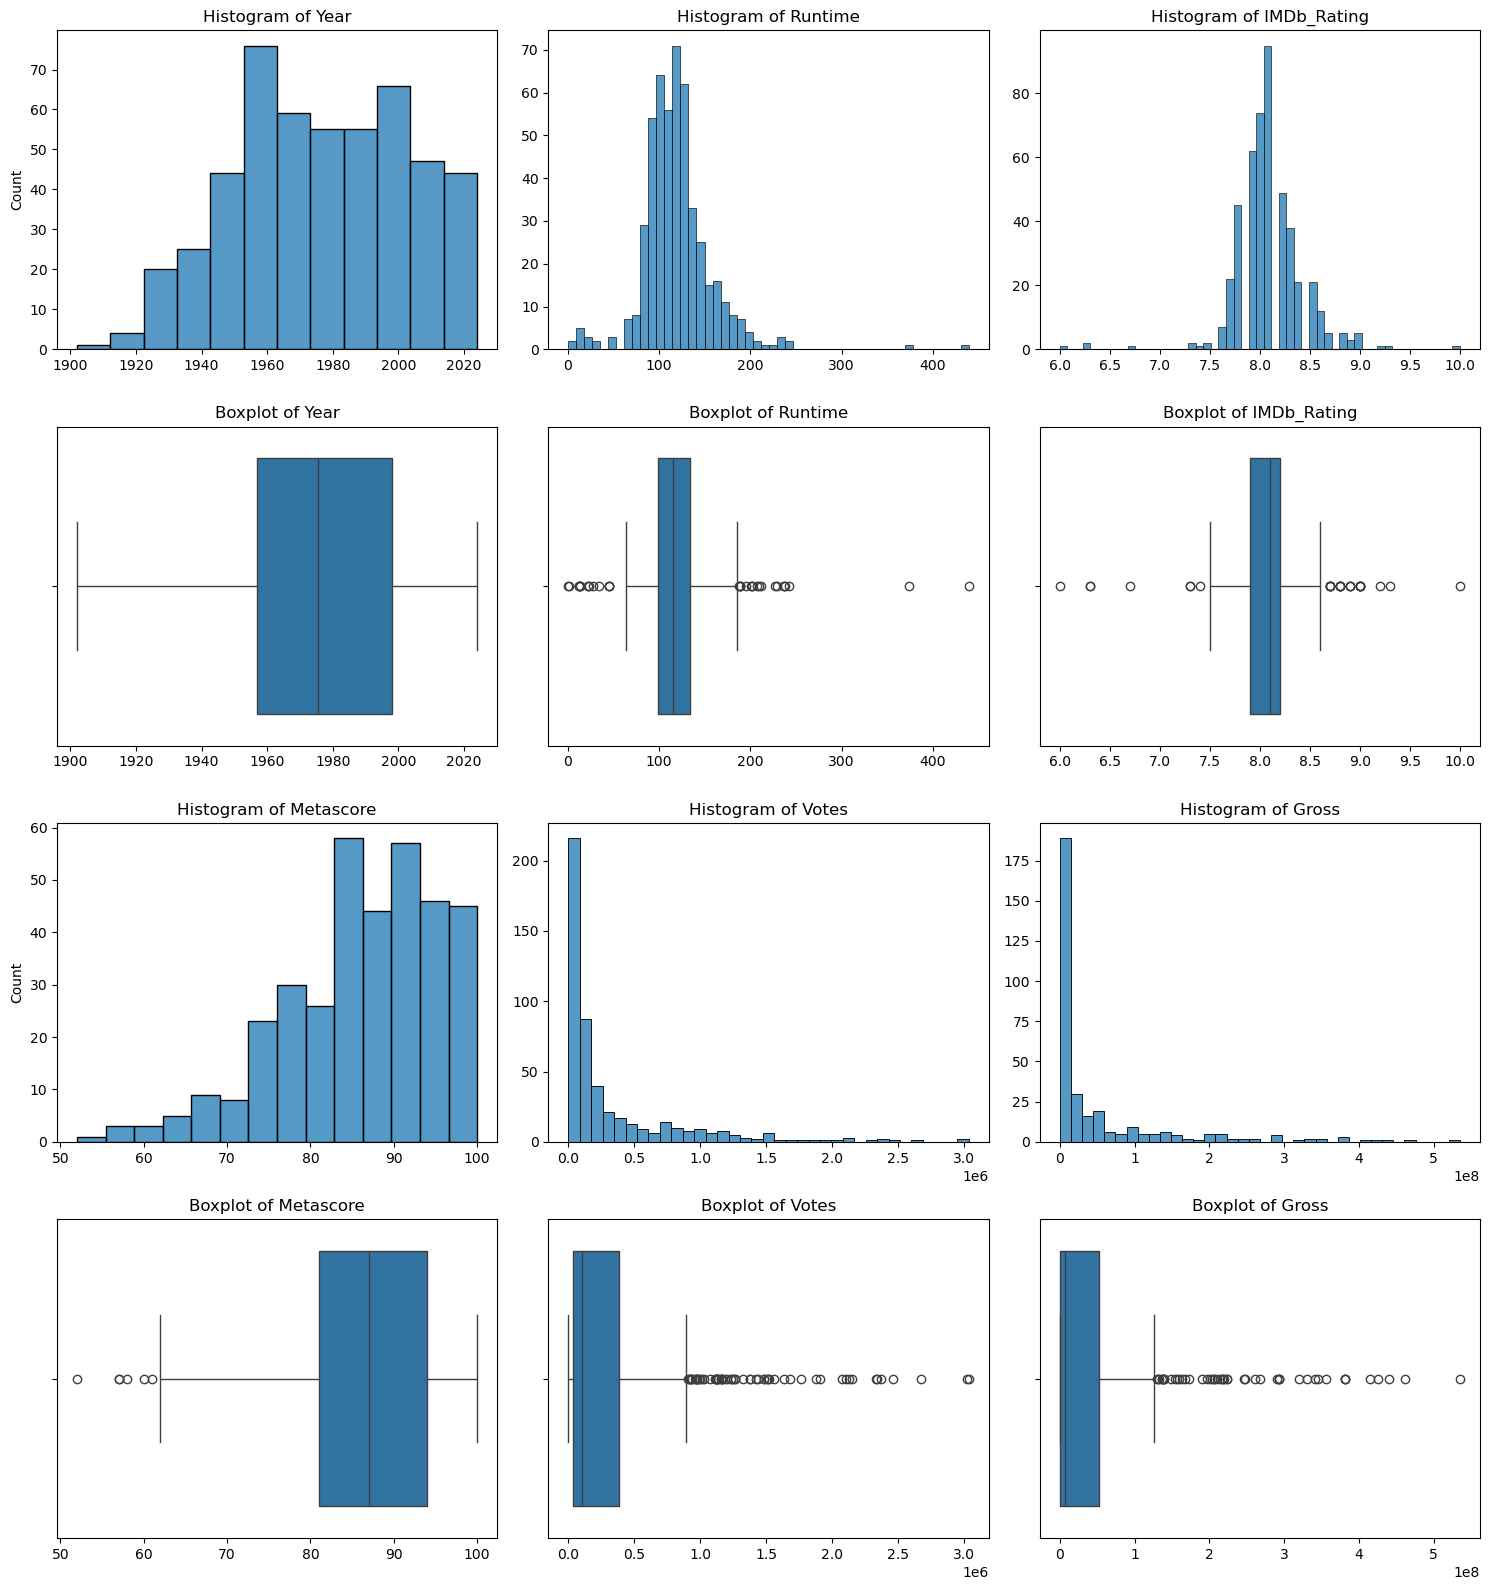

In [283]:
_, axes = plt.subplots(4, 3, figsize=(15, 16))

for i, col in enumerate(numeric_cols[:3]):
    sns.histplot(data=df_movies, x=col, ax=axes[0, i])
    axes[0, i].set_xlabel('')
    axes[0, i].set_title(f'Histogram of {col}')
    sns.boxplot(data=df_movies, x=col, ax=axes[1, i])
    axes[1, i].set_xlabel('')
    axes[1, i].set_title(f'Boxplot of {col}')
    if i >=1:
        axes[0, i].set_ylabel('')
for i, col in enumerate(numeric_cols[3:]):
    sns.histplot(data=df_movies, x=col, ax=axes[2, i])
    axes[2, i].set_xlabel('')
    axes[2, i].set_title(f'Histogram of {col}')
    sns.boxplot(data=df_movies, x=col, ax=axes[3, i])
    axes[3, i].set_xlabel('')
    axes[3, i].set_title(f'Boxplot of {col}')
    if i >=1:
        axes[2, i].set_ylabel('')
        
plt.tight_layout()

**Inference:**

When examining the Histograms and Boxplots of each numerical variable, several insightful patterns emerge:

- **Year:**
  The distribution of `Year` appears left-skewed, suggesting that a majority of movies in the top 1000 IMDb list were produced from the 1960s onwards. Notably, the earliest movie on the list dates back to the 1900s, highlighting the historical breadth of the selection.

- **Runtime:**
  The `Runtime` variable's distribution is centered around the 100 to 130-minute range, indicating that most movies within the dataset have typical lengths. Outliers are evident both on the longer end (duration exceeding 200 minutes) and the shorter end (a single movie with a duration under 50 minutes).

- **Rating and Metascore:**
  While the Histogram of `IMDB_ Rating` is skewed, the `Metascore` distribution leans left. Despite this divergence in distribution shapes, both scores exhibit similar ranges. The interquartile range (IQR) of `IMDB_ Rating` falls between approximately 7.7 and 8.3, while for `Metascore`, the IQR spans around 70 to 90. An intriguing point is that, despite being the top 1000 IMDb movies, `Metascore` has some outliers with scores under 70, in contrast to `IMDB_ Rating`.

- **Votes and Gross:**
  The distributions of both `Votes` and `Gross` exhibit a right-skewed pattern, implying that the majority of movies received a substantial yet modest number of votes and generated moderate revenue. The existence of few outliers in both categories emphasizes the  influence exerted by a select few movies, which contributes to a marked increase in the overall vote count and gross revenue figures.

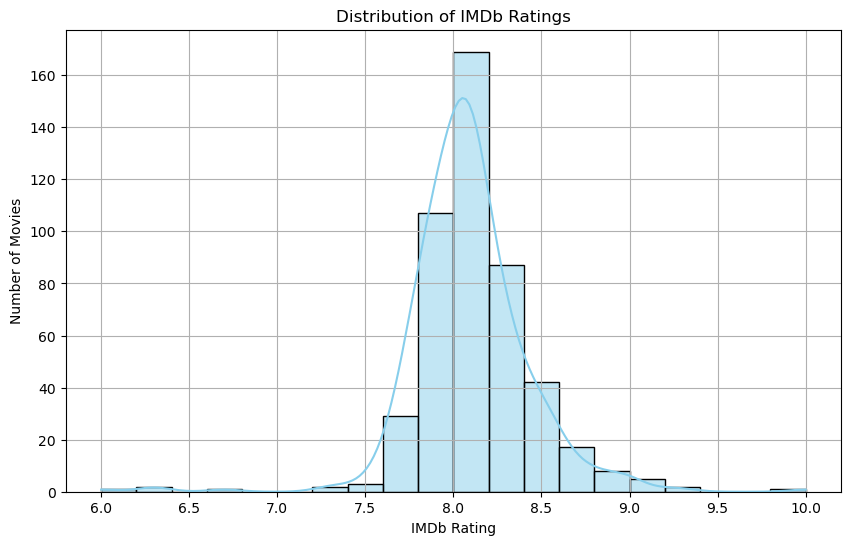

In [284]:
plt.figure(figsize=(10,6))
sns.histplot(df_movies['IMDb_Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


That plot clearly shows that most top-rated movies fall between 8.7 and 9.0 on IMDb

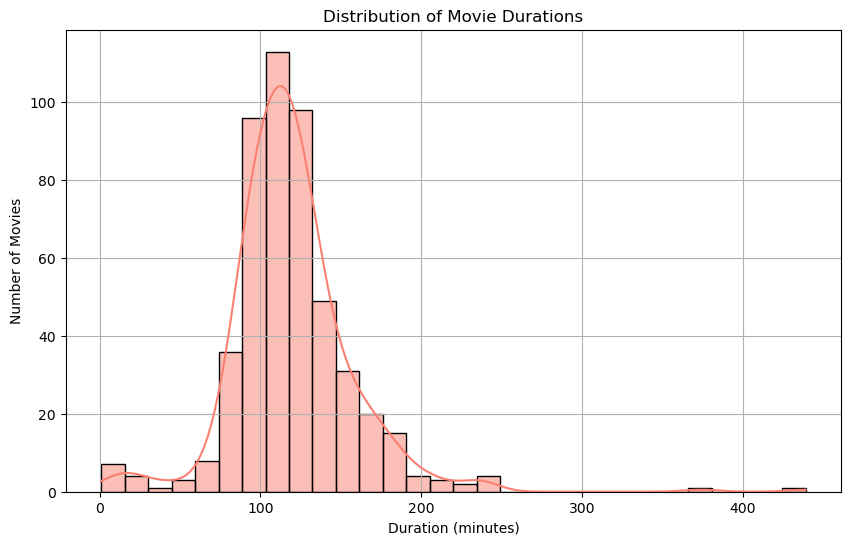

In [285]:
plt.figure(figsize=(10,6))
sns.histplot(df_movies['Runtime'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

This gives us a sense of how long top movies tend to be.


In [286]:
df_movies[['Votes', 'Gross']].describe()

,Votes,Gross
count,4.960000e+02,3.300000e+02
mean,3.278971e+05,5.290395e+07
std,4.996923e+05,9.497186e+07
min,5.000000e+00,5.090000e+02
25%,3.604600e+04,3.821342e+05
50%,1.061360e+05,6.761398e+06
75%,3.801740e+05,5.220882e+07
max,3.031101e+06,5.349871e+08


### Categorical Var Analysis


- Top Content Groups and Content Ratings
- Top Directors and Actors
- Top Genres

#### Movie Name

Finding films with highest and lowest metrics in the data:

In [287]:
highest_rating_movie = df_movies[df_movies['IMDb_Rating'] == df_movies['IMDb_Rating'].max()]['Movie Name'].values[0]
highest_rating_year = df_movies[df_movies['IMDb_Rating'] == df_movies['IMDb_Rating'].max()]['Year'].values[0]
print(f"Movie with the highest 'IMDb_Rating': {highest_rating_movie}, made in {highest_rating_year}, with a Rating of {df_movies['IMDb_Rating'].max()}.")
print("---")
highest_metascore_movie = df_movies[df_movies['Metascore'] == df_movies['Metascore'].max()]['Movie Name'].values[0]
highest_metascore_year = df_movies[df_movies['Metascore'] == df_movies['Metascore'].max()]['Year'].values[0]
print(f"Movie with the highest 'Metascore': {highest_metascore_movie}, made in {highest_metascore_year}, with a Metascore of {df_movies['Metascore'].max()}.")
print("---")
highest_votes_movie = df_movies[df_movies['Votes'] == df_movies['Votes'].max()]['Movie Name'].values[0]
highest_votes_year = df_movies[df_movies['Votes'] == df_movies['Votes'].max()]['Year'].values[0]
print(f"Movie with the highest 'Votes': {highest_votes_movie}, made in {highest_votes_year}, with {df_movies['Votes'].max()/1e6:.2f} million Votes.")
print("---")
highest_gross_movie = df_movies[df_movies['Gross'] == df_movies['Gross'].max()]['Movie Name'].values[0]
highest_gross_year = df_movies[df_movies['Gross'] == df_movies['Gross'].max()]['Year'].values[0]
print(f"Movie with the highest 'Gross': {highest_gross_movie}, made in {highest_gross_year}, with a Gross revenue of ${df_movies['Gross'].max()}")
print("---")
longest_duration_movie = df_movies[df_movies['Runtime'] == df_movies['Runtime'].max()]['Movie Name'].values[0]
longest_duration_year = df_movies[df_movies['Runtime'] == df_movies['Runtime'].max()]['Year'].values[0]
print(f"Movie with the longest 'Runtime': {longest_duration_movie}, made in {longest_duration_year}, with a Duration of {df_movies['Runtime'].max()} minutes.")


Movie with the highest 'IMDb_Rating': Mon oncle, made in 2017, with a Rating of 10.0.
---
Movie with the highest 'Metascore': The Godfather, made in 1972, with a Metascore of 100.0.
---
Movie with the highest 'Votes': The Shawshank Redemption, made in 1994, with 3.03 million Votes.
---
Movie with the highest 'Gross': The Dark Knight, made in 2008, with a Gross revenue of $534987076.0
---
Movie with the longest 'Runtime': Satantango, made in 1994, with a Duration of 439.0 minutes.


In [288]:
lowest_rating_movie = df_movies[df_movies['IMDb_Rating'] == df_movies['IMDb_Rating'].max()]['Movie Name'].values[0]
lowest_rating_year = df_movies[df_movies['IMDb_Rating'] == df_movies['IMDb_Rating'].max()]['Year'].values[0]
print(f"Movie with the lowest 'Rating': {lowest_rating_movie}, made in {lowest_rating_year}, with a Rating of {df_movies['IMDb_Rating'].min()}.")
print("---")
lowest_metascore_movie = df_movies[df_movies['Metascore'] == df_movies['Metascore'].min()]['Movie Name'].values[0]
lowest_metascore_year = df_movies[df_movies['Metascore'] == df_movies['Metascore'].min()]['Year'].values[0]
print(f"Movie with the lowest 'Metascore': {lowest_metascore_movie}, made in {lowest_metascore_year}, with a Metascore of {df_movies['Metascore'].min()}.")
print("---")
lowest_gross_movie = df_movies[df_movies['Gross'] == df_movies['Gross'].min()]['Movie Name'].values[0]
lowest_gross_year = df_movies[df_movies['Gross'] == df_movies['Gross'].min()]['Year'].values[0]
print(f"Movie with the lowest 'Gross': {lowest_gross_movie}, made in {lowest_gross_year}, with a Gross revenue of ${df_movies['Gross'].min()}")
print("---")
shortest_duration_movie = df_movies[df_movies['Runtime'] == df_movies['Runtime'].min()]['Movie Name'].values[0]
shortest_duration_year = df_movies[df_movies['Runtime'] == df_movies['Runtime'].min()]['Year'].values[0]
print(f"Movie with the shortest 'Runtime': {shortest_duration_movie}, made in {shortest_duration_year}, with a Duration of {df_movies['Runtime'].min()} minutes.")

Movie with the lowest 'Rating': Mon oncle, made in 2017, with a Rating of 6.0.
---
Movie with the lowest 'Metascore': Ghost in the Shell, made in 2017, with a Metascore of 52.0.
---
Movie with the lowest 'Gross': The 400 Blows, made in 1959, with a Gross revenue of $509.0
---
Movie with the shortest 'Runtime': Le Cercle Rouge, made in 2021, with a Duration of 1.0 minutes.


#### Rated

In [289]:
df_movies['Rated'].value_counts().to_frame().T

Rated,Not Rated,R,PG,Approved,PG-13,G,Passed,TV-MA,Unrated,TV-G,M/PG,GP,TV-14,NC-17
count,155,128,74,67,30,26,7,2,2,1,1,1,1,1


Below is the table having description about different types of content rating.

| Content Rating | Description                                                 |
|----------------|-------------------------------------------------------------|
| Not Rated      | Movies that have not been assigned a specific rating. |
| R              | Restricted, children under 17 require accompanying parents or adult guardians. |
| PG             | Parental guidance suggested, some material may not be suitable for children. |
| Approved       | Movies that have been approved for all audiences. |
| PG-13          | Parents strongly cautioned, some material may be inappropriate for children under 13. |
| G              | Suitable for all ages and audiences. |
| Passed         | Movies that have been passed for all audiences. |
| TV-MA          | Intended for mature audiences only, may contain graphic violence, explicit sex, or strong language. |
| Unrated        | Movies with an unknown or missing rating. |
| TV-G          | Parental guidance suggested for some material. |
| M/PG           | Intended for mature audiences, parental guidance suggested. |
| GP             | Suitable for general audiences. |
| TV-14          | Parents strongly cautioned, some material may be inappropriate for children under 14. |
| NC-17          | Intended for adults only, children under 17 not admitted. |

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/1536190952.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




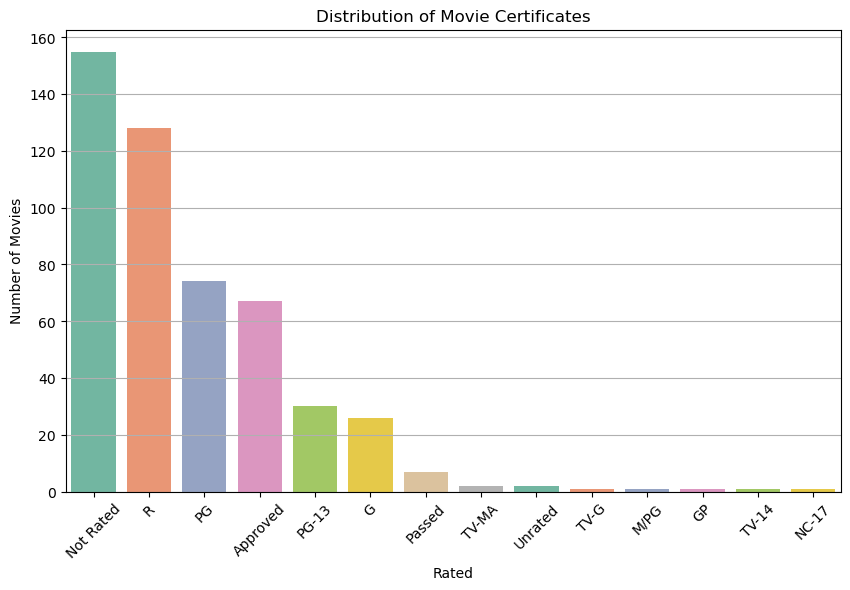

In [290]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_movies, x='Rated', order=df_movies['Rated'].value_counts().index, palette='Set2')
plt.title('Distribution of Movie Certificates')
plt.xlabel('Rated')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


**Inference:**

Upon examining the content ratings of the movies in the dataset, several observations can be made:

- The majority of films, over 150 in number, are rated 'Not Rated', signifying content suitable for **All Ages**.
- The 'R' category follows with around 130 movies, indicating content for **Adults**.
- 'PG-13' and 'PG','Approved' occupy the 3rd, 4th and 5th positions, each with approximately 50-70 movies, representing content for **Teens/PG**.
- The 'Passed', 'G', and 'Approved' categories are all part of the **All Ages** group, each with just under 20 movies.
- Other categories have significantly fewer movies, typically less than 10.

This analysis provides insight into the distribution of content ratings and their corresponding target audiences.

#### Directors

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/347952120.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




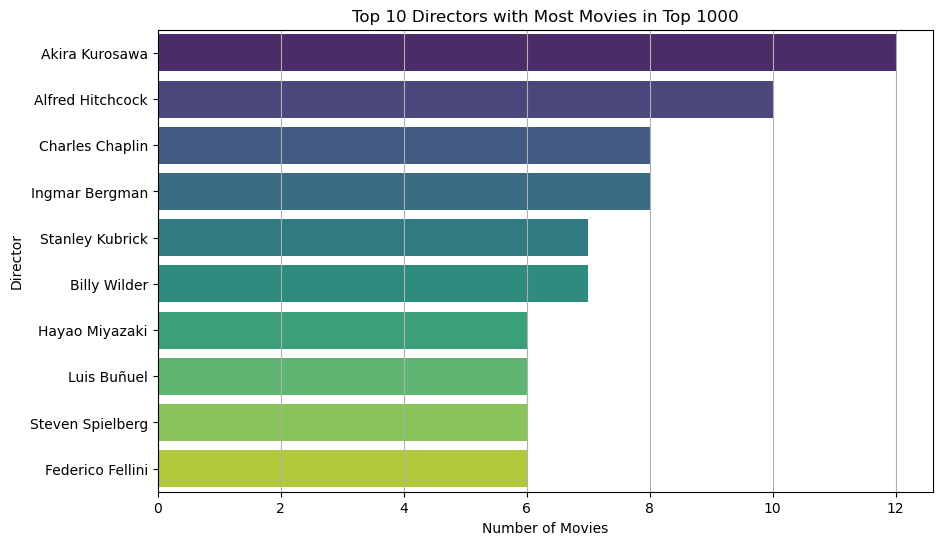

In [291]:
top_directors = df_movies['Director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors with Most Movies in Top 1000')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.grid(True, axis='x')
plt.show()

This horizontal bar chart will give a quick snapshot of the most represented directors

**Inference:**

Akira Kurosawa lead the list with 12 movies, followed by Alfred Hitchcock and Charles Chaplin with 10 films each respectively. Other directors such as Ingmar Bergman, Hayao Miyazaki share the same number of 10 movies to their name.

In [292]:
#Contribution of these directors:

top_10_directors_list = top_directors.index.to_list()

director_results_df = pd.DataFrame(columns=['Top 10 Director', 'Year', 'Runtime', 'IMDb_Rating', 'Metascore', 'Votes', 'Gross'])

for name in top_10_directors_list:
    director_data = df_movies[df_movies['Director'] == name][['Year', 'Runtime', 'IMDb_Rating', 'Metascore', 'Votes', 'Gross']].mean().to_frame().T.round(1)
    director_data['Top 10 Director'] = name  
    director_results_df = pd.concat([director_results_df, director_data], ignore_index=True)

director_results_df


/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/266176764.py:10: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Top 10 Director,Year,Runtime,IMDb_Rating,Metascore,Votes,Gross
0,Akira Kurosawa,1963.5,139.3,8.2,91.4,103044.5,849447.5
1,Alfred Hitchcock,1951.3,111.1,8.1,91.1,292282.5,12933970.5
2,Charles Chaplin,1935.0,99.4,8.2,92.2,133343.6,82464.7
3,Ingmar Bergman,1965.5,102.2,8.0,89.2,82428.2,6783304.0
4,Stanley Kubrick,1971.7,130.7,8.3,83.3,655403.6,37706219.2
5,Billy Wilder,1953.4,115.7,8.2,87.6,166470.0,9449822.5
6,Hayao Miyazaki,1994.2,114.8,8.2,84.0,435543.7,6599227.0
7,Luis Buñuel,1966.0,95.8,7.9,88.5,29431.8,44321.5
8,Steven Spielberg,1986.3,140.8,8.4,86.0,1021646.8,244333135.3
9,Federico Fellini,1960.0,126.2,8.0,91.7,66430.2,276802.8


**Inference:**

- The correlation between film `Year`  and `Gross` earnings suggests that more recent films tend to generate higher gross earnings. Additionally, there is a strong positive correlation between gross earnings and the number of votes a movie receives. Notably, **Akira Kurosawa** on the 1st spot and **Steven Spielberg** also among top 10 in terms of average gross earnings, despite having an average gross of only 1.1 million dollars. This indicates that directors from less film-popular countries like **Japan (Akira Kurosawa and Hayao Miyazaki)** and **Sweden (Ingmar Bergman)** can produce high-quality films that might receive less attention and revenue.


- It's also worth noting that **Alfred Hitchcock**, **Akira Kurosawa**, and **Ingmar Bergman** primarily directed movies in the mid-20th century, while other directors like Christopher Nolan and Quentin Tarantino are more active in the 21st century. This might contribute to differences in their film styles, themes, and their impact on the audience.

#### Stars

In [293]:
df_movies['Stars'].head()

0                Marlon Brando, Al Pacino, James Caan
1            Al Pacino, Robert De Niro, Robert Duvall
2     Toshirô Mifune, Takashi Shimura, Keiko Tsushima
3             Henry Fonda, Lee J. Cobb, Martin Balsam
4    Charles Chaplin, Virginia Cherrill, Florence Lee
Name: Stars, dtype: object

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/252812708.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




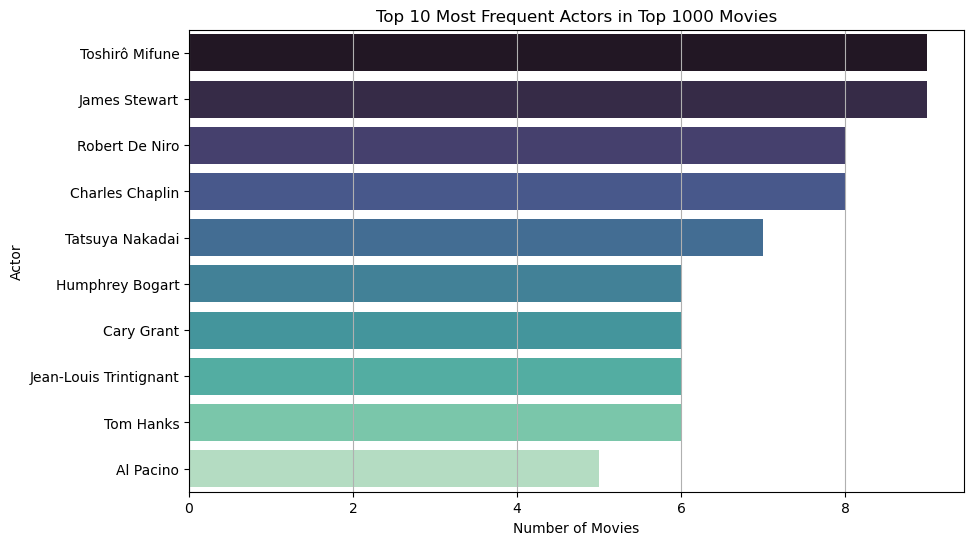

In [294]:
all_actors = df_movies['Stars'].dropna().apply(lambda x: [actor.strip() for actor in x.split(',')])
flat_actor_list = [actor for sublist in all_actors for actor in sublist]
actor_counts = Counter(flat_actor_list).most_common(10)
top_actors = [actor for actor, count in actor_counts]
actor_df = pd.DataFrame(actor_counts, columns=['Actor', 'Number of Movies'])
plt.figure(figsize=(10,6))
sns.barplot(data=actor_df, x='Number of Movies', y='Actor', palette='mako')
plt.title('Top 10 Most Frequent Actors in Top 1000 Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.grid(True, axis='x')
plt.show()

Actors that  appear most frequently across the top 1000 movies

In [295]:
# Define a function to check if any top actor is in the 'Stars' list
def has_top_actor(stars):
    if pd.isna(stars):
        return False
    actors = [actor.strip() for actor in stars.split(',')]
    return any(actor in top_actors for actor in actors)

# Apply the function to filter the DataFrame
top_actor_movies = df_movies[df_movies['Stars'].apply(has_top_actor)]

# Select the desired columns to display
selected_columns = ['Movie Name', 'Year', 'Runtime', 'IMDb_Rating', 'Metascore', 'Votes', 'Gross']
top_actor_movies = top_actor_movies[selected_columns]


In [296]:
top_actor_movies

,Movie Name,Year,Runtime,IMDb_Rating,Metascore,Votes,Gross
0,The Godfather,1972,175.0,9.2,100.0,2121667.0,136381073.0
1,The Godfather Part II,1974,202.0,9.0,90.0,1424468.0,47834595.0
2,Seven Samurai,1954,207.0,8.6,98.0,379094.0,820278.0
4,City Lights,1931,87.0,8.5,99.0,205485.0,19181.0
8,Modern Times,1936,87.0,8.5,96.0,272428.0,163577.0
...,...,...,...,...,...,...,...
453,The Roaring Twenties,1939,106.0,7.9,80.0,16367.0,NaN
469,Bringing Up Baby,1938,102.0,7.8,91.0,67611.0,NaN
474,His Girl Friday,1940,92.0,7.8,NaN,64510.0,296000.0
478,Charade,1963,113.0,7.8,83.0,88013.0,NaN


**Inference:** 

Notably, Toshiro Mifun and James Stewart shines with an impressive 10 appearances. Robert De Niro follows closely with a notable count of 8 appearances.

Sharing the spotlight are Charles Chaplin and Tatsayu, each leaving a significant mark with 8 appearances.

It's particularly intriguing to observe the international resonance of this list.

#### Genre

In [297]:
df_movies['Genre'].value_counts().to_frame().head(10)

,count
Genre,
Drama,66
"Drama, Romance",31
"Crime, Drama",19
"Comedy, Drama, Romance",17
"Comedy, Drama",16
"Drama, War",15
"Crime, Drama, Mystery",11
"Crime, Drama, Thriller",11
"Animation, Adventure, Comedy",10


/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/3277442376.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




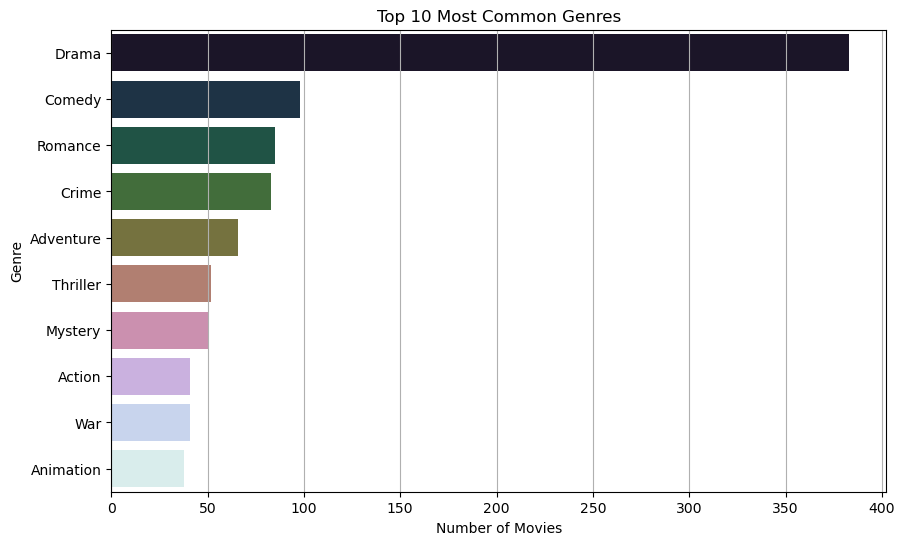

In [298]:
all_genres = df_movies['Genre'].dropna().apply(lambda x: [g.strip() for g in x.split(',')])
flat_genre_list = [genre for sublist in all_genres for genre in sublist]
from collections import Counter
genre_counts = Counter(flat_genre_list).most_common(10)
genre_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])
plt.figure(figsize=(10,6))
sns.barplot(data=genre_df, x='Count', y='Genre', palette='cubehelix')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.grid(True, axis='x')
plt.show()


This will give us a sense of whether drama, crime, or action dominates the top-tier cinema list.

**Note:**

We noticed that the `Genre` column contains multiple genres for each movie entry, sometimes leading to duplicate values and potentially obscuring meaningful insights. Hence we did the following,

In [299]:
unique_genres = set()

for genres in df_movies['Genre']:
    if isinstance(genres, str):
        unique_genres.update(genres.split(', '))

unique_genres_list = sorted(list(unique_genres))
print(f"There are {len(unique_genres_list)} unique genres among 'Genre' column.\n\n{unique_genres_list}")


There are 25 unique genres among 'Genre' column.

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']


In [300]:
for genre in unique_genres_list:
    df_movies[genre] = np.where(df_movies['Genre'].str.contains(genre), 1, 0)

In [301]:
pd.set_option('display.max_columns', None)
df_movies.loc[:, 'Action':]

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
492,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
493,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
494,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/2590809589.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




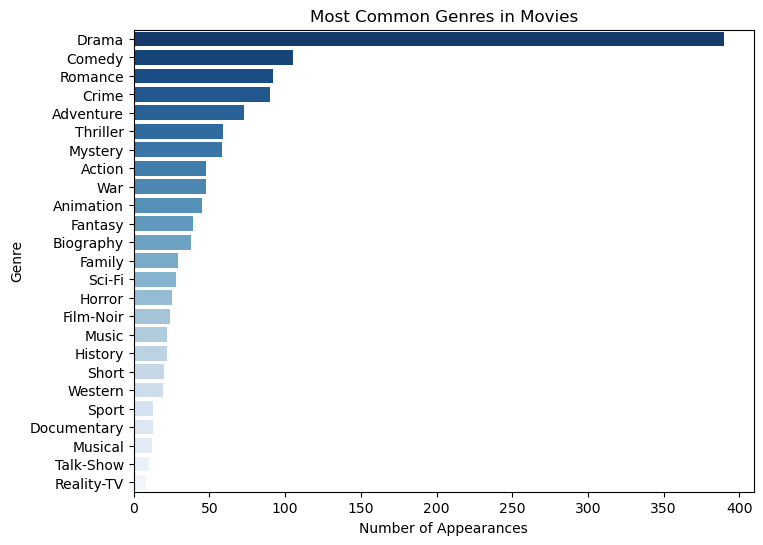

In [302]:
plt.figure(figsize=(8,6))
genre_count = df_movies.loc[:, 'Action':].sum().sort_values(ascending=False)
sns.barplot(x=genre_count.values, y=genre_count.index, palette='Blues_r')
plt.title('Most Common Genres in Movies')
plt.xlabel('Number of Appearances')
plt.ylabel('Genre');

**Inference:**

Among the top 1000 IMDB movies, the most prevalent genre is 'Drama', accounting for over 300 movies. Following are 'Comedy', 'Action', 'Crime', and 'Adventure', each with approximately 100 appearances.

Conversely, 'Sports', 'Musical', and 'Western' are the least common genres, each appearing in only around 15 movies. The other genres fall within a range of 100 to 200 appearances.

This distribution reflects the dominant influence of 'Drama' in the selection, followed by a mix of popular genres.

### Correlation Analysis

Now checking the correlation matrix to see how numeric variables like IMDb_Rating, Metascore, Votes, Gross_Millions, and Runtime relate to each other.

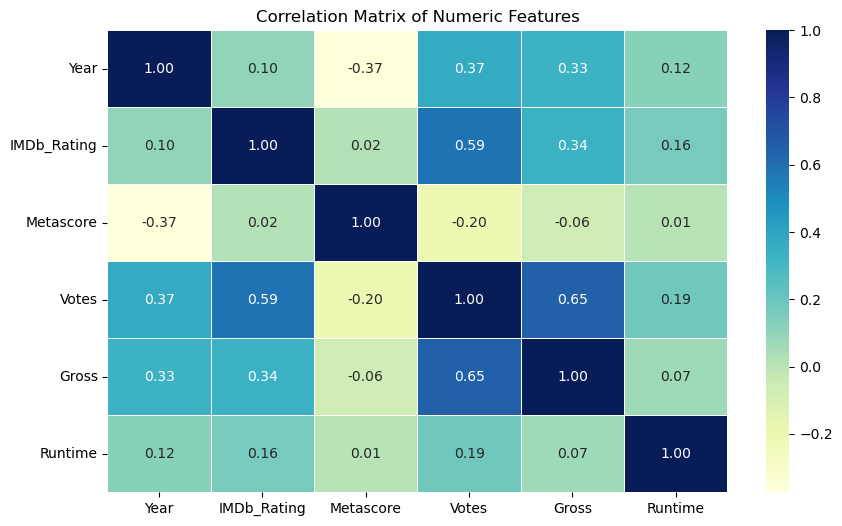

In [303]:
numeric_cols = ['Year','IMDb_Rating', 'Metascore', 'Votes', 'Gross', 'Runtime']
corr_matrix = df_movies[numeric_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

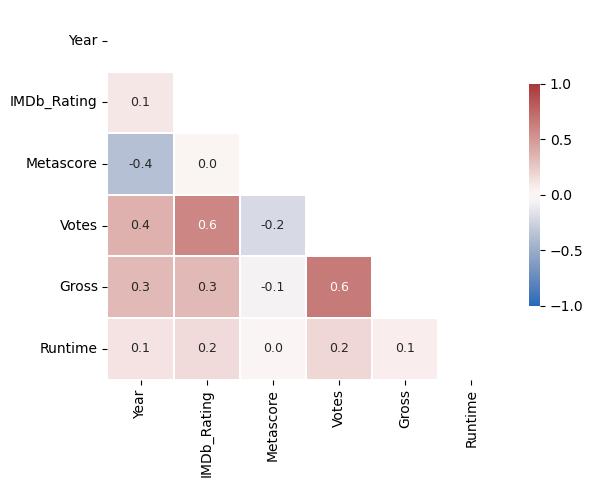

In [304]:
sns.heatmap(corr_matrix, 
            mask=np.triu(corr_matrix), 
            annot=True, annot_kws={'size':9}, 
            linecolor='w', linewidth=0.1, 
            fmt='.1f', 
            cbar_kws={'shrink':0.6}, 
            vmin=-1, vmax=1, center=0, 
            cmap='vlag');

**Inference:**

After a thorough analysis of the heatmap, a clear correlation emerges between several pairs of variables.
- Notably, the correlation coefficient of 0.6 between `Votes` and `IMDB_Rating` emphasizes a substantial and positive connection between these two aspects.
- Additionally, a significant correlation is noticeable between `Gross` and `Votes`, as evidenced by a correlation coefficient of 0.6.
- On a different note, the `Year` exhibits a negative correlation of -0.4 with `Metascore`. This suggests that more contemporary films tend to receive comparatively lower Metascores, implying a trend of decreasing critical reception over time.

Next we have pairplot to see the relationship more clearly:

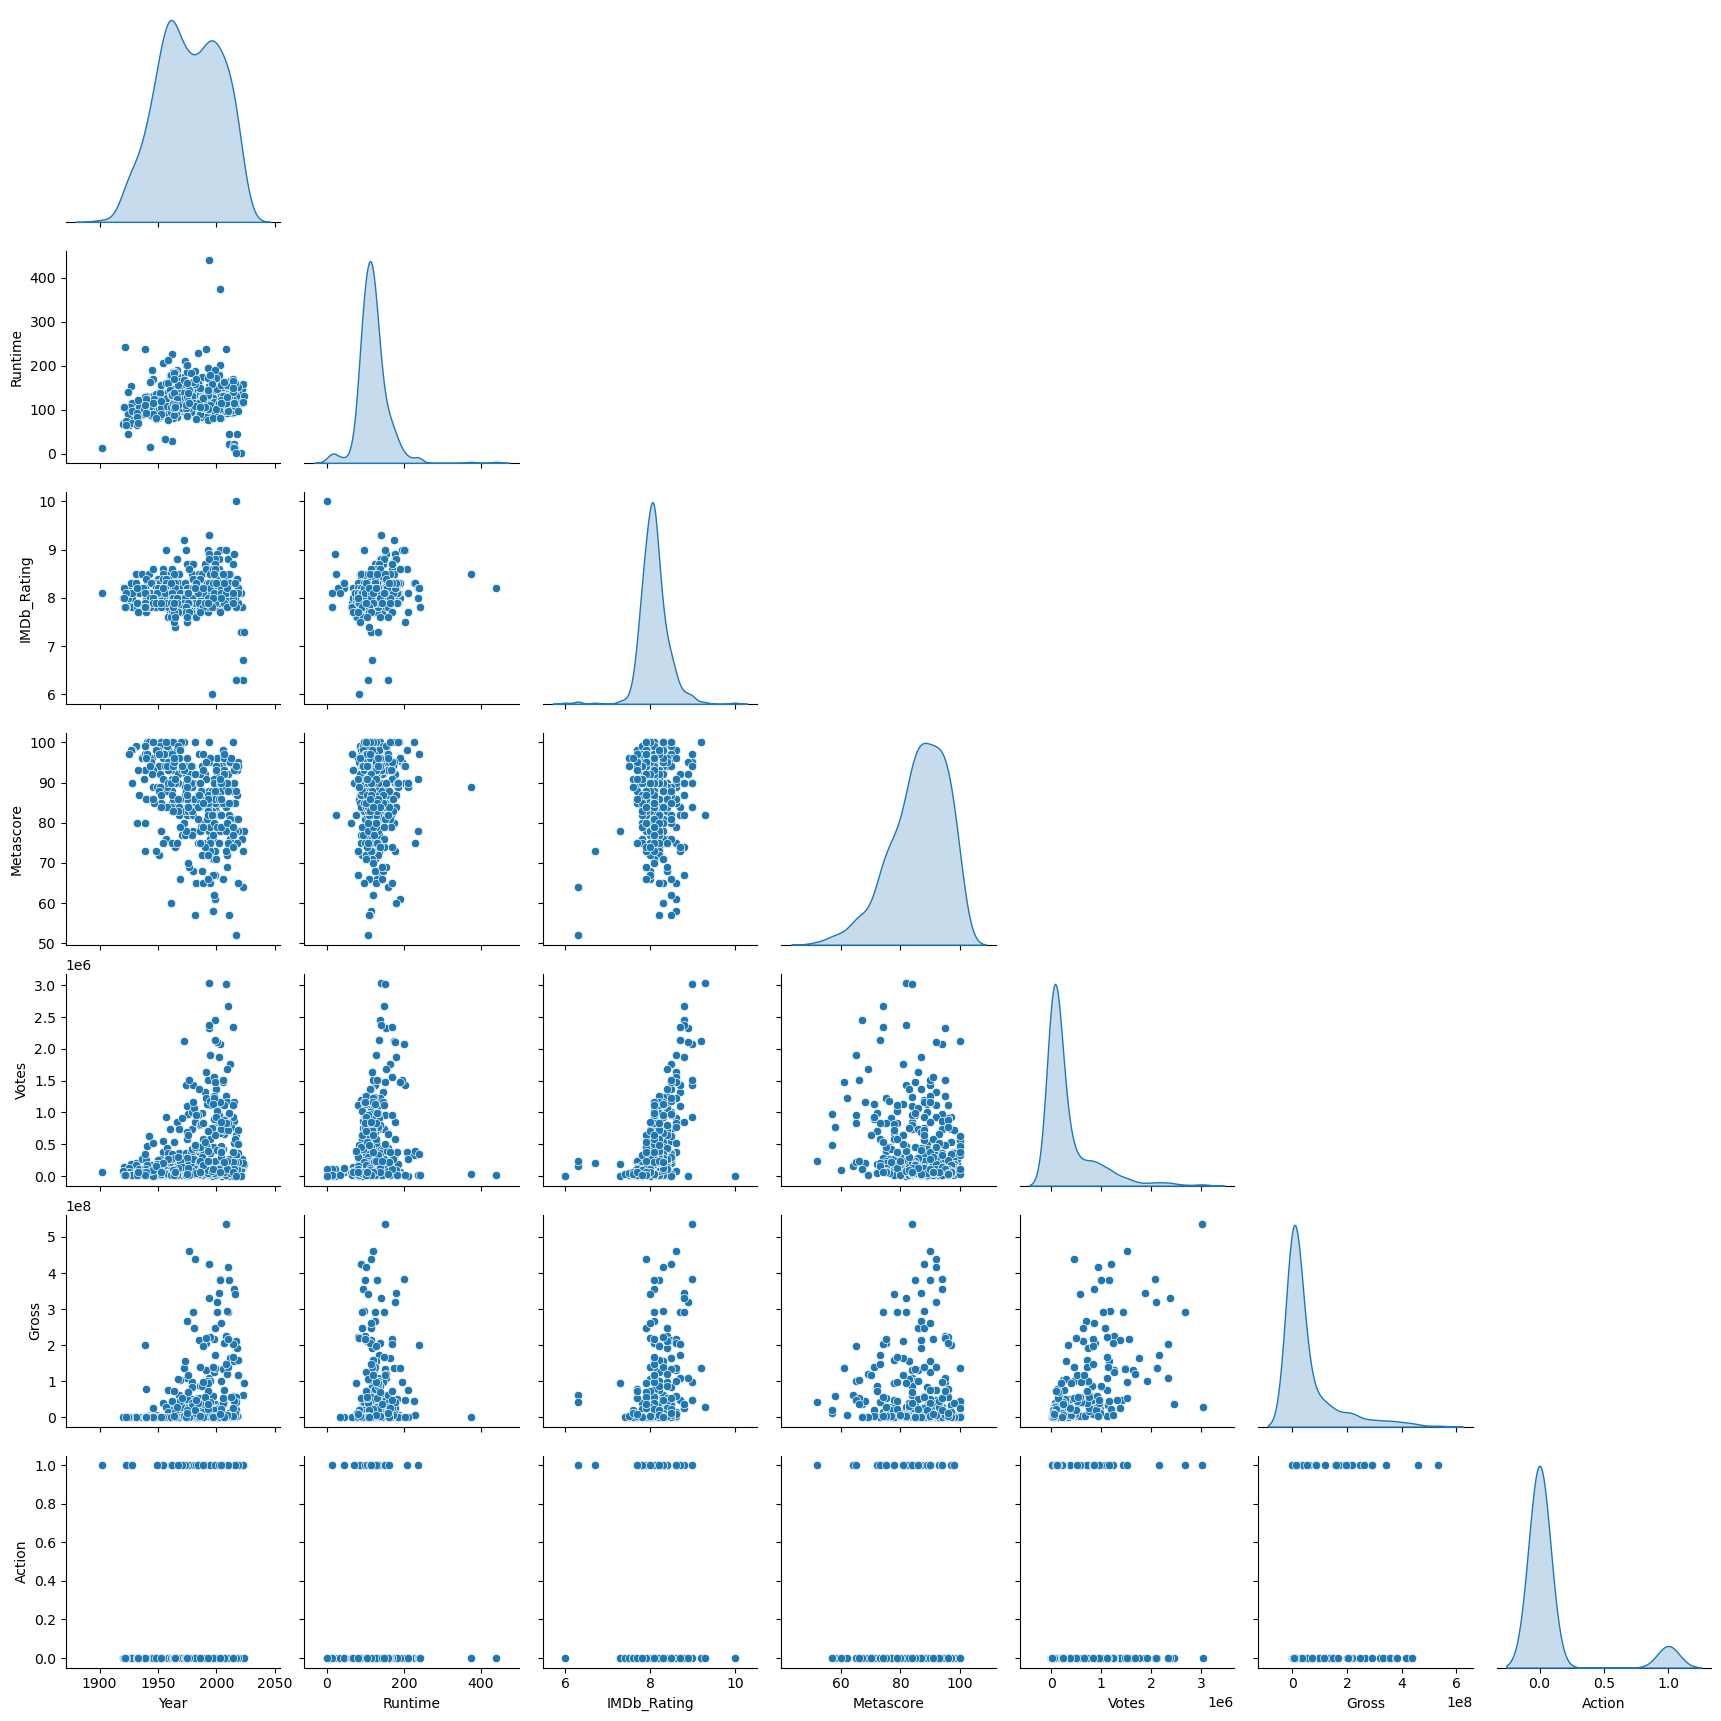

In [305]:
sns.pairplot(df_movies.iloc[:, :12], corner=True, diag_kind='kde');

**Inference:**

Upon observing the pairplot, distinct patterns become evident that were not immediately apparent from the correlation analysis:
- Relationships between `Year` and variables such as `Votes`, `Gross`, and `Metascore` manifest more prominently in the pairplot compared to the correlation coefficients mentioned earlier.
- Furthermore, a captivating pattern materializes when exploring the interplay between `Gross` and both `IMDB_ Rating` and `Metascore`. This intriguing relationship is more vividly captured in the pairplot, revealing potential insights not fully depicted by mere correlation values.

### Trend & Time Series

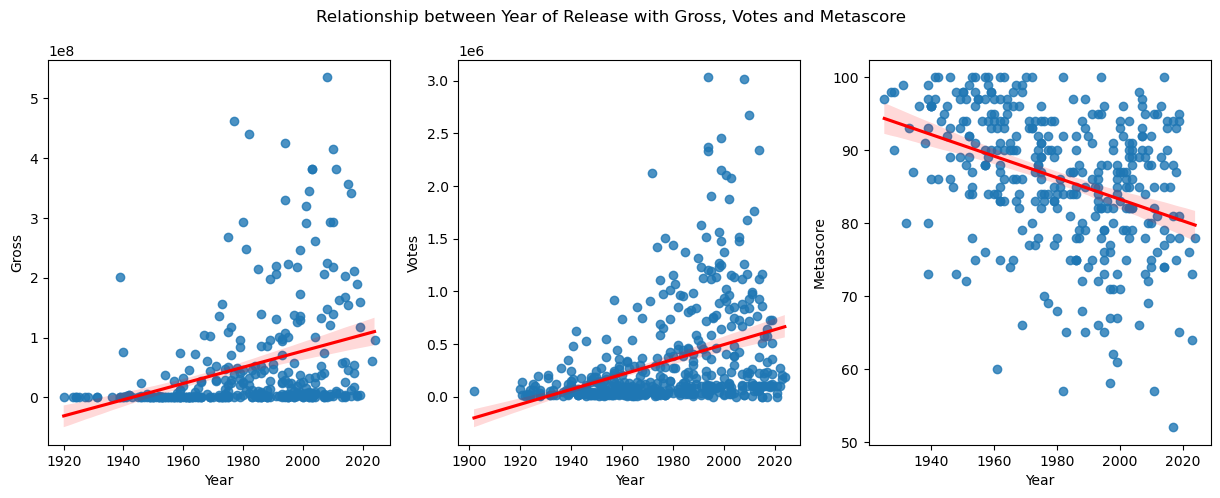

In [306]:
_, axes = plt.subplots(1,3, figsize=(15,5))

for i, col in enumerate(['Gross','Votes','Metascore']):
    sns.regplot(data=df_movies, x='Year', y=col, ax=axes[i], line_kws={'color': 'r'})

plt.suptitle('Relationship between Year of Release with Gross, Votes and Metascore');

**Inference:**

Observed, a positive correlation exists between the `Gross` and `Votes` metrics with the `Year` in the dataset. This correlation can be attributed to the expanding global population and the growing accessibility to movies over time. As the population increases, more individuals have the opportunity to watch and engage with movies, leading to higher movie revenues (`Gross`) and greater participation in rating and reviewing (`Votes`).

However, it's important to note that a recent trend shows a negative correlation between the `Metascore` and the `Year`. This suggests that movies released more recently have been receiving lower Metascores compared to those in the past so more analysis should be conducted to check this assumption.

In [307]:
print(f"The number of movies in top 500 IMDB repleased after 1980 is {len(df_movies[df_movies['Year'] > 1980])}.")

The number of movies in top 500 IMDB repleased after 1980 is 224.


**Inference:** 

After the year 1980, a notable surge in movie listings is observed, with a median of around 16 movies being added each year. Particularly since the year 2000, the rate of new movie additions appears to surpass the median of the "after 1980" period. However, there is a slight drop below the "after 1980" median in the year 2020, indicating a potential anomaly or a temporary shift in the trend.

In [308]:
df_movies['Year Range'] = pd.cut(
    df_movies['Year'],         
    bins=[1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2023], 
    labels=['1920-1930','1930-1940','1940-1950','1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2010','2010-2023'] 
)

df_movies.groupby('Year Range')[['Runtime','Gross','IMDb_Rating','Metascore','Votes']].agg(['count','mean']).round(1).T

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/114565127.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Year Range         1920-1930   1930-1940  1940-1950  1950-1960   1960-1970  \
Runtime     count       18.0        26.0       38.0       63.0        66.0   
            mean        97.8       107.8      107.2      115.5       124.9   
Gross       count        6.0         9.0       19.0       34.0        33.0   
            mean    592321.2  30958613.0  2176323.8  6775714.5  15729547.9   
IMDb_Rating count       18.0        26.0       38.0       63.0        66.0   
            mean         8.0         8.0        8.1        8.1         8.0   
Metascore   count        4.0        16.0       21.0       43.0        45.0   
            mean        95.8        91.1       93.0       91.3        88.5   
Votes       count       18.0        26.0       38.0       63.0        66.0   
            mean     51468.8     94441.8   109451.5   130669.7    110473.6   

Year Range          1970-1980   1980-1990   1990-2000    2000-2010   2010-2023  
Runtime     count        59.0        50.0        64.0         54.0        55.0  
            mean        127.3       125.1       127.2        131.8       106.4  
Gross       count        45.0        44.0        57.0         50.0        31.0  
            mean   53611587.5  47077314.4  65549236.5  104159675.2  92306242.8  
IMDb_Rating count        59.0        48.0        60.0         53.0        42.0  
            mean          8.0         8.1         8.2          8.2         8.1  
Metascore   count        48.0        38.0        55.0         51.0        36.0  
            mean         86.4        82.5        81.1         85.3        82.5  
Votes       count        59.0        50.0        64.0         54.0        55.0  
            mean     327319.9    351528.6    681475.7     711114.2    369983.9

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/1330219874.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/1330219874.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/1330219874.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/1330219874.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

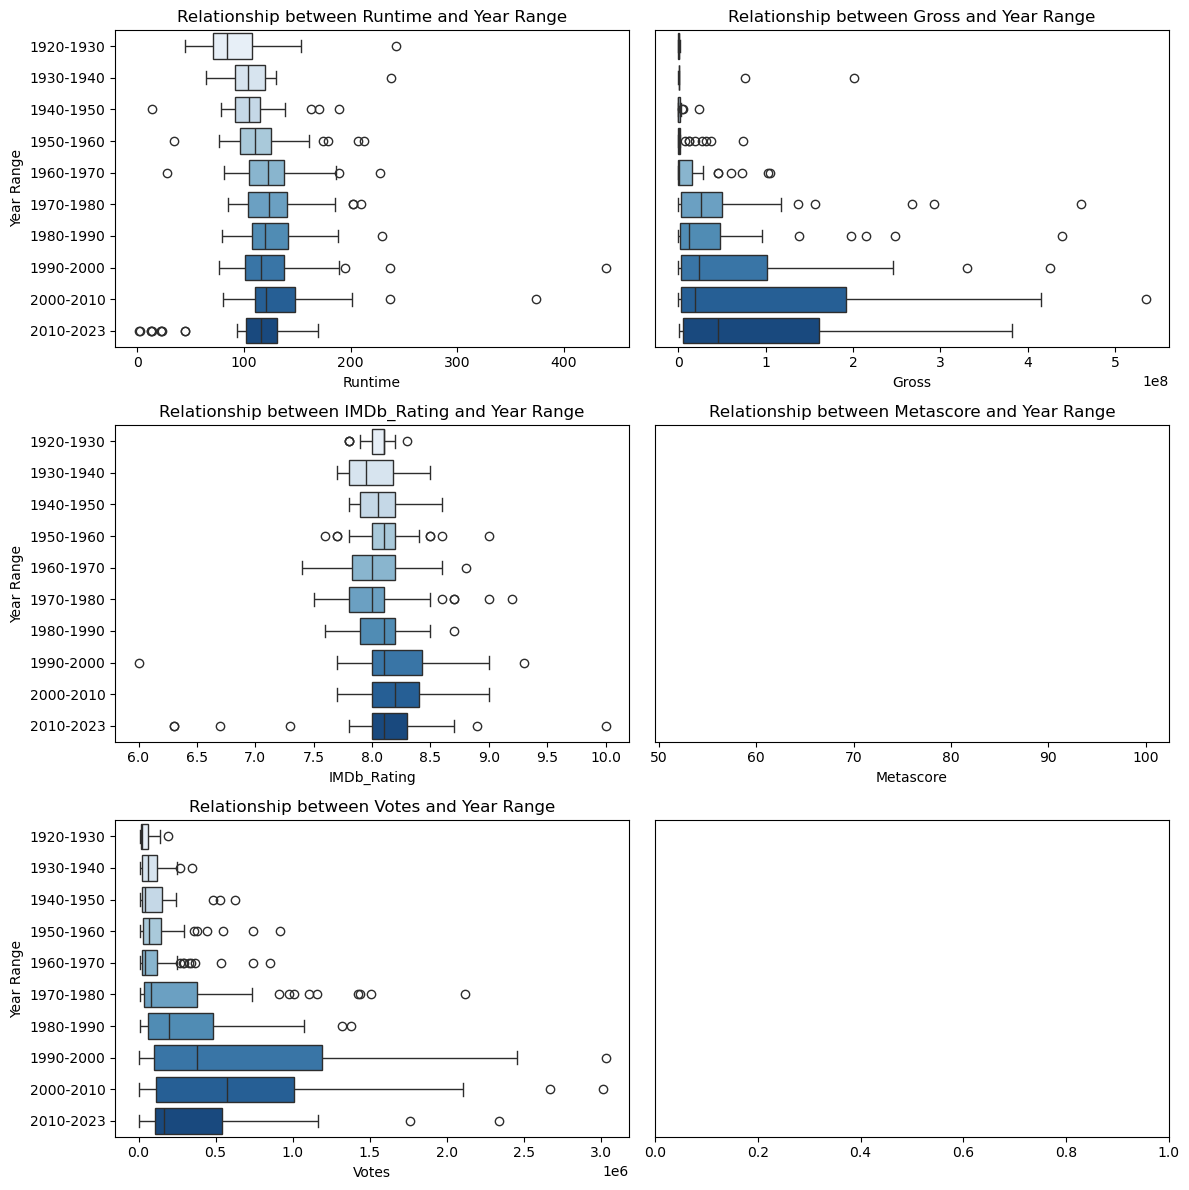

In [309]:
_, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, col in enumerate(['Runtime', 'Gross', 'IMDb_Rating', 'Metascore', 'Votes']):
    sns.boxplot(data=df_movies, y='Year Range', x=col, ax=axes[i//2, i%2], palette='Blues')
    axes[i//2, i%2].set_title(f'Relationship between {col} and Year Range')
    if i >=1:
        axes[i//2, 1].set_ylabel('')
        axes[i//2, 1].set_yticks([])

plt.tight_layout();

## ii. Key Data Analysis

#### 1. directors whose films consistently get high IMDb ratings. We'll calculate the average rating per director

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/2028576292.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




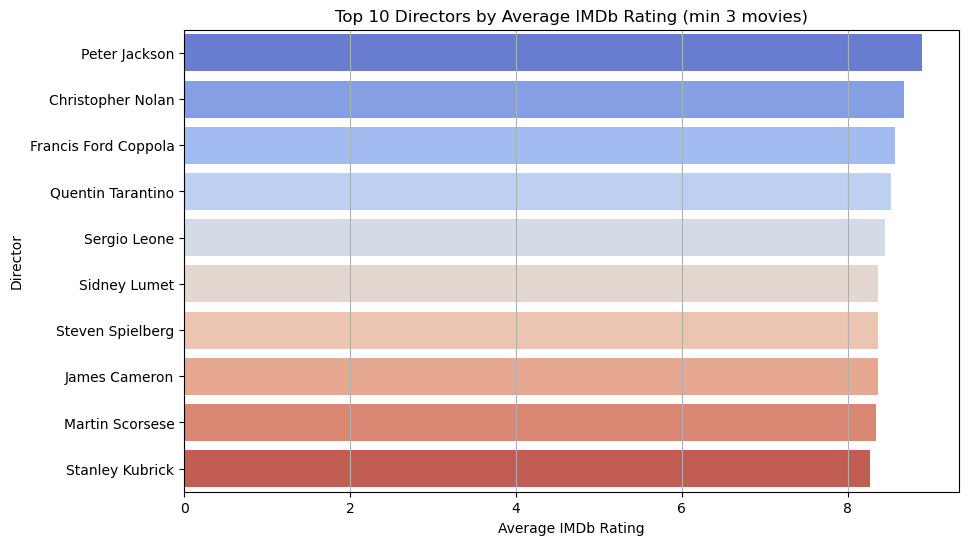

In [310]:
director_stats = df_movies.groupby('Director').agg({'IMDb_Rating': ['mean', 'count']})
director_stats.columns = ['Avg_Rating', 'Movie_Count']
director_stats = director_stats[director_stats['Movie_Count'] >= 3]
top_directors_rating = director_stats.sort_values('Avg_Rating', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors_rating['Avg_Rating'], y=top_directors_rating.index, palette='coolwarm')
plt.title('Top 10 Directors by Average IMDb Rating (min 3 movies)')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.grid(True, axis='x')
plt.show()


#### 2. Let’s see if higher-rated movies tend to make more money. This plot will help reveal whether critical acclaim translates into commercial success—and if certain certificates (like PG-13) dominate the box office.

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/110570269.py:5: UserWarning:

The palette list has more values (24) than needed (14), which may not be intended.



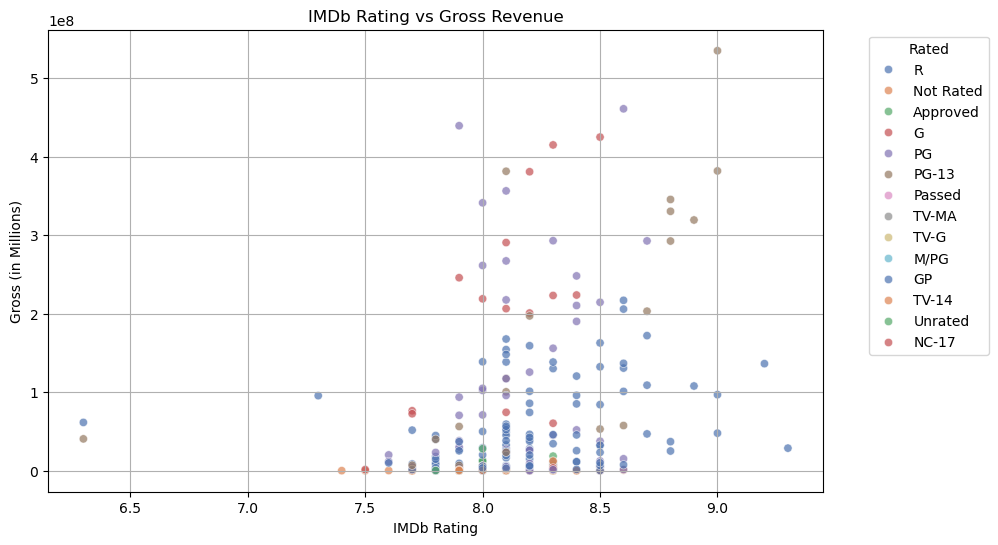

In [311]:
unique_certificates = df_movies['IMDb_Rating'].nunique()
dark_palette = sns.color_palette("deep", n_colors=unique_certificates)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_movies,
    x='IMDb_Rating',
    y='Gross',
    hue='Rated',
    palette=dark_palette,
    alpha=0.7
)
plt.title('IMDb Rating vs Gross Revenue')
plt.xlabel('IMDb Rating')
plt.ylabel('Gross (in Millions)')
plt.grid(True)
plt.legend(title='Rated', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Inference: The plot shows that high rated movies usually have a high gross revenue but extremely  high rated movies(IMDB> 9) were not really the exclusive top earners suggesting that critical acclaim and success does not go hand-in-hand always.

#### 3. Are the most voted movies also the ones that made the most money?

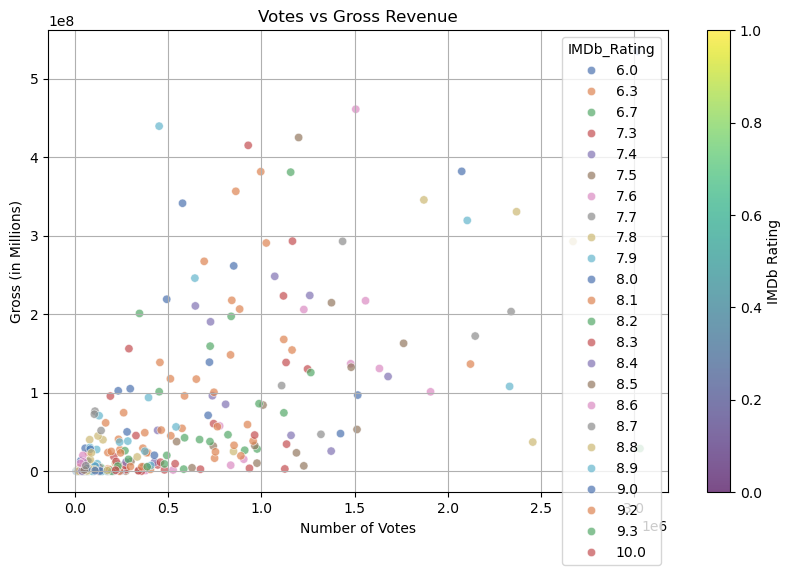

In [312]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_movies,
    x='Votes',
    y='Gross',
    hue='IMDb_Rating',
    palette='deep',
    alpha=0.7
)
plt.title('Votes vs Gross Revenue')
plt.xlabel('Number of Votes')
plt.ylabel('Gross (in Millions)')
plt.grid(True)
plt.colorbar(scatter.collections[0], label='IMDb Rating')

plt.show()


**Inference**:

We saw a strong positive correlation that more  votes  movie gets the stronger it does at the box office financially, suggesting that popular engagement often goes  hand in hand with commercial success.

In [313]:
# slopes_by_rating = slopes_by_rating.dropna().sort_values(by='Regression_Slope', ascending=False)

# plt.figure(figsize=(10,6))
# sns.barplot(data=slopes_by_rating, x='Regression_Slope', y='Rated', palette='coolwarm')
# plt.title('Regression Slopes: IMDb Rating vs Year by Certificate')
# plt.xlabel('Slope (Rating per Year)')
# plt.ylabel('Certificate')
# plt.grid(True, axis='x')
# plt.tight_layout()
# plt.show()


#### 4. This gives a great view of which genres are critically loved.

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/4186363662.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




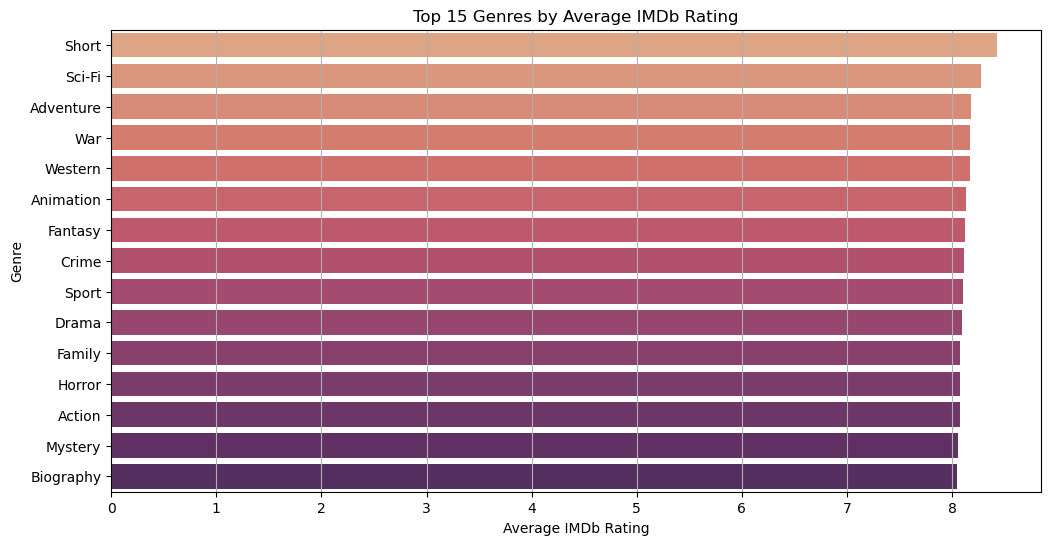

In [314]:
df_genre = df_movies.copy()
df_genre['Genre'] = df_genre['Genre'].str.split(',')
df_genre = df_genre.explode('Genre')
df_genre['Genre'] = df_genre['Genre'].str.strip()

genre_ratings = df_genre.groupby('Genre')['IMDb_Rating'].mean().sort_values(ascending=False).head(15).reset_index()


plt.figure(figsize=(12,6))
sns.barplot(data=genre_ratings, x='IMDb_Rating', y='Genre', palette='flare')
plt.title('Top 15 Genres by Average IMDb Rating')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Genre')
plt.grid(True, axis='x')
plt.show()


Inference: Short film became the genre with maximum number of movies that were highly rated in the top 500.

#### 5. Actor-director combinations that appear most frequently together in the IMDb Top 1000

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/3918851780.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




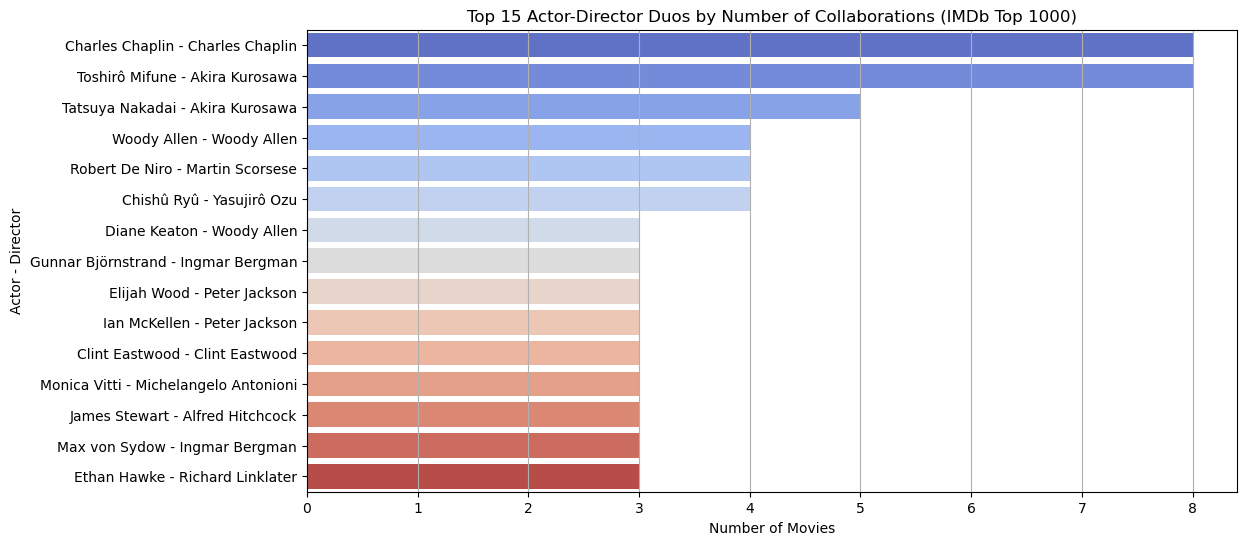

In [315]:
df_duo = df_movies.copy()
df_duo['Stars'] = df_duo['Stars'].str.split(',')
df_duo = df_duo.explode('Stars')
df_duo['Stars'] = df_duo['Stars'].str.strip()
df_duo['Actor_Director'] = df_duo['Stars'] + " - " + df_duo['Director']

duo_counts = df_duo['Actor_Director'].value_counts().head(15).reset_index()
duo_counts.columns = ['Actor-Director Pair', 'Movie_Count']


plt.figure(figsize=(12,6))
sns.barplot(data=duo_counts, x='Movie_Count', y='Actor-Director Pair', palette='coolwarm')
plt.title('Top 15 Actor-Director Duos by Number of Collaborations (IMDb Top 1000)')
plt.xlabel('Number of Movies')
plt.ylabel('Actor - Director')
plt.grid(True, axis='x')
plt.show()


Inference:  Charles chaplin made highest number of movies where he was the actor as well as the director with maximum number of movies in top 500 followed by Toshiro muifun and Akira Kurosawa

#### 6. Whether higher-rated movies also tend to make more money

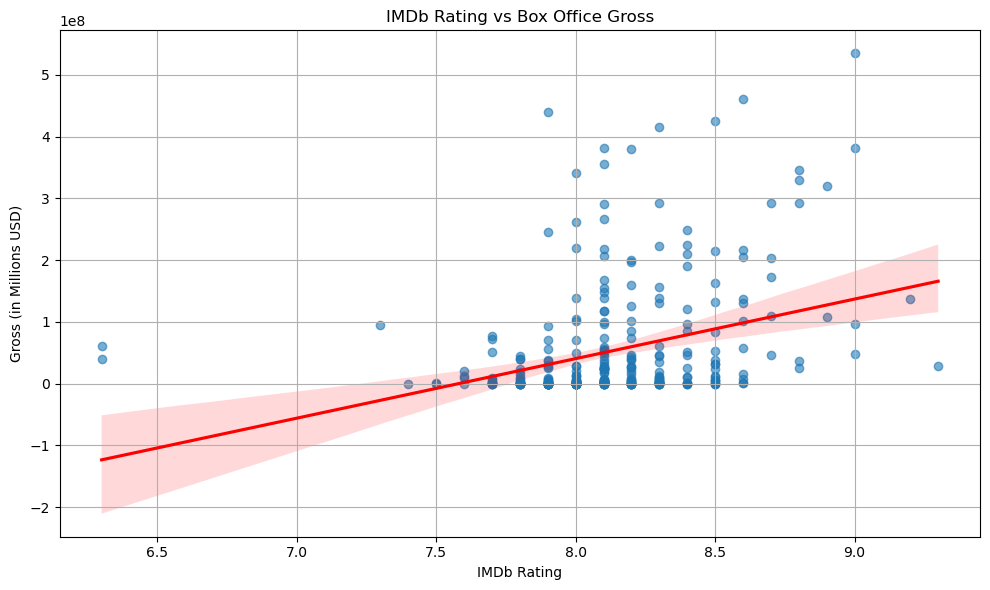

In [316]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_movies, x='IMDb_Rating', y='Gross', scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.title('IMDb Rating vs Box Office Gross')
plt.xlabel('IMDb Rating')
plt.ylabel('Gross (in Millions USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


Inference: The plot shows that high rated movies usually have a high gross review but extremely  high rated movies(IMDB> 9) were not really the exclusive top earners suggesting that critical acclaim and success does not go hand-in-hand always.

## iii. Statistical Analysis

Regression Slopes-

### Finding how a director’s movie ratings have changed over time?

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/4141355137.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/4141355137.py:14: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/4141355137.py:23: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping c

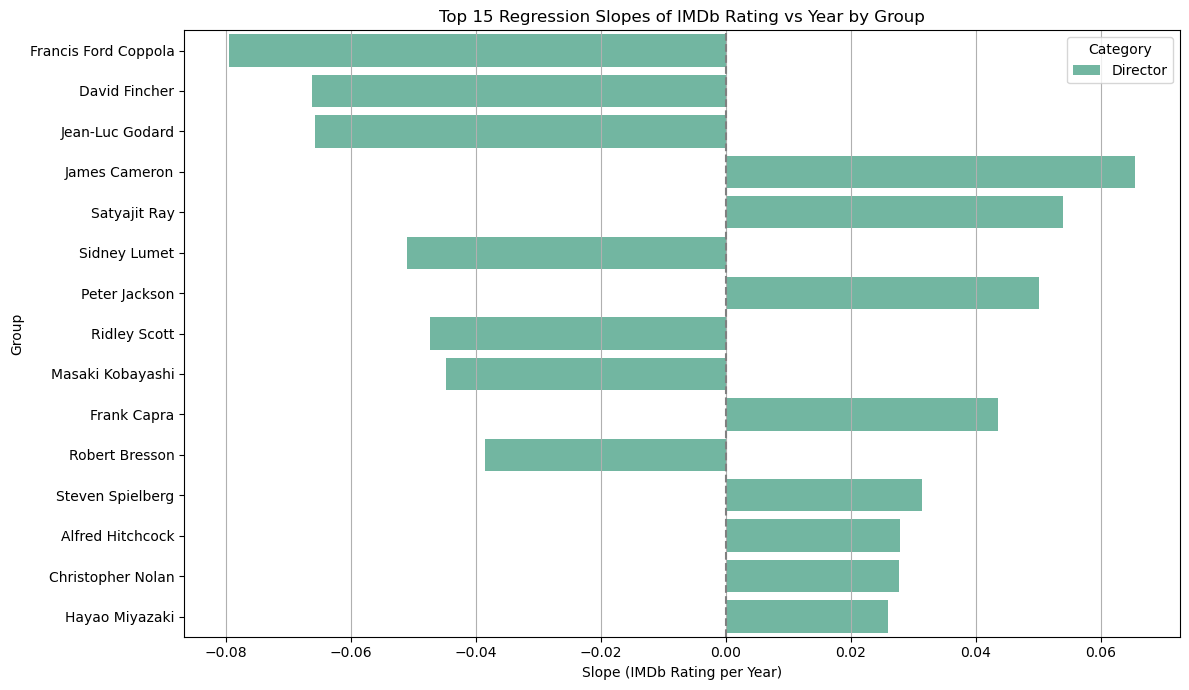

In [317]:
def compute_slope(group_df):
    if group_df['Year'].nunique() > 1:
        slope, _, _, _, _ = linregress(group_df['Year'], group_df['IMDb_Rating'])
        return slope
    return None

slopes_by_rated = df_movies.groupby('Rated').apply(compute_slope).dropna().reset_index()
slopes_by_rated.columns = ['Group', 'Regression_Slope']
slopes_by_rated['Category'] = 'Rated'
df_genre = df_movies.copy()
df_genre = df_genre.dropna(subset=['Genre']) 
df_genre['Genre'] = df_genre['Genre'].str.split(', ')
df_genre = df_genre.explode('Genre')
slopes_by_genre = df_genre.groupby('Genre').apply(compute_slope).dropna().reset_index()
slopes_by_genre.columns = ['Group', 'Regression_Slope']
slopes_by_genre['Category'] = 'Genre'

#Slopes by Director (only if they directed ≥ 3 movies)
df_director = df_movies.copy()
director_counts = df_director['Director'].value_counts()
eligible_directors = director_counts[director_counts >= 3].index
df_director = df_director[df_director['Director'].isin(eligible_directors)]
slopes_by_director = df_director.groupby('Director').apply(compute_slope).dropna().reset_index()
slopes_by_director.columns = ['Group', 'Regression_Slope']
slopes_by_director['Category'] = 'Director'
slopes_combined = pd.concat([slopes_by_rated, slopes_by_genre, slopes_by_director], ignore_index=True)
top_slopes = slopes_combined.reindex(slopes_combined['Regression_Slope'].abs().sort_values(ascending=False).index).head(15)

plt.figure(figsize=(12, 7))
sns.barplot(data=top_slopes, x='Regression_Slope', y='Group', hue='Category', dodge=False, palette='Set2')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Top 15 Regression Slopes of IMDb Rating vs Year by Group')
plt.xlabel('Slope (IMDb Rating per Year)')
plt.ylabel('Group')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


**Inference**:

We performed a regression analysis of IMDb Rating over Year of Release for each director with at least 3 movies in the dataset. The results show a diverse pattern: directors like James Cameron and Satyajit Ray exhibited strong positive trends in ratings over time, suggesting growing acclaim or improved quality. Conversely, directors such as Francis Ford Coppola and David Fincher showed negative slopes, indicating higher ratings for their earlier works. These trends offer insight into the temporal evolution of directors’ filmography and critical reception.

### Adressing if movies of top actors getting better or worse ratings over time?

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/3997619518.py:14: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/3997619518.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




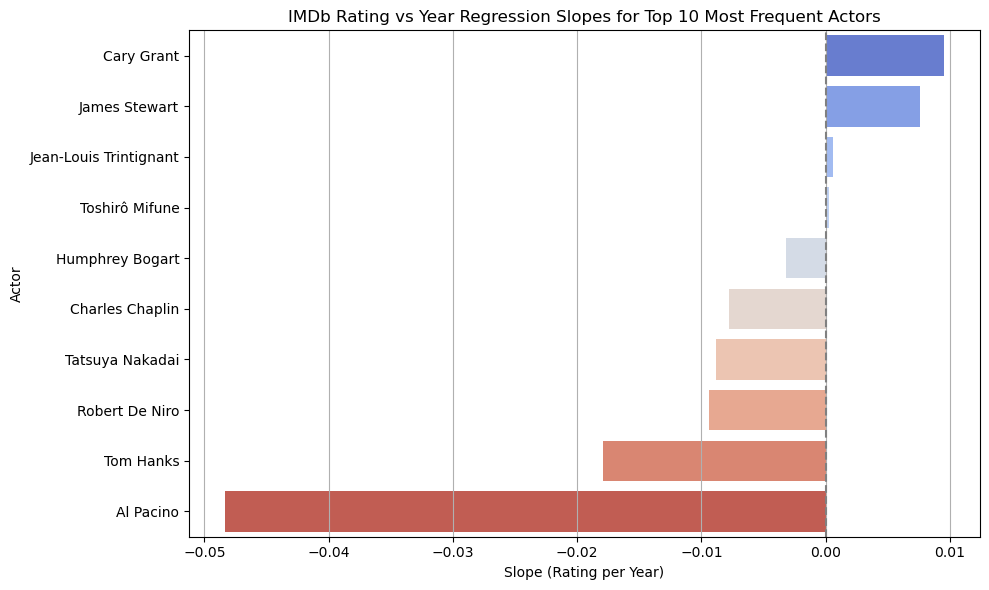

In [318]:
all_actors = df_movies['Stars'].dropna().apply(lambda x: [actor.strip() for actor in x.split(',')])
flat_actor_list = [actor for sublist in all_actors for actor in sublist]
actor_counts = Counter(flat_actor_list).most_common(10)
top_actors = [actor for actor, _ in actor_counts]
df_actors = df_movies[['Movie Name', 'Year', 'IMDb_Rating', 'Stars']].dropna()
df_actors['Stars'] = df_actors['Stars'].apply(lambda x: [actor.strip() for actor in x.split(',')])
df_actors = df_actors.explode('Stars')
df_actors = df_actors[df_actors['Stars'].isin(top_actors)]
def compute_actor_slope(group_df):
    if group_df['Year'].nunique() > 1:
        slope, _, _, _, _ = linregress(group_df['Year'], group_df['IMDb_Rating'])
        return slope
    return None
actor_slopes = df_actors.groupby('Stars').apply(compute_actor_slope).dropna().reset_index()
actor_slopes.columns = ['Actor', 'Regression_Slope']
actor_slopes = actor_slopes.sort_values(by='Regression_Slope', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=actor_slopes, x='Regression_Slope', y='Actor', palette='coolwarm')
plt.title('IMDb Rating vs Year Regression Slopes for Top 10 Most Frequent Actors')
plt.xlabel('Slope (Rating per Year)')
plt.ylabel('Actor')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

**Inference**:

We analyzed the top 10 most frequently appearing actors in our dataset to observe how their IMDb ratings have changed over time. Actors like Cary Grant and James Stewart exhibit slightly positive rating trends, suggesting rising appreciation of their later work. Conversely, actors such as Al Pacino and Tom Hanks show negative trends, indicating higher critical acclaim in the earlier stages of their careers. These slopes offer insights into temporal audience perception and critical reception across decades of acting work.

### Figuring out if movies in different genres getting better or worse reception over the decades?”

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/3009456308.py:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/y_/h9q3m7l503sfh318q70dx3xm0000gn/T/ipykernel_22711/3009456308.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




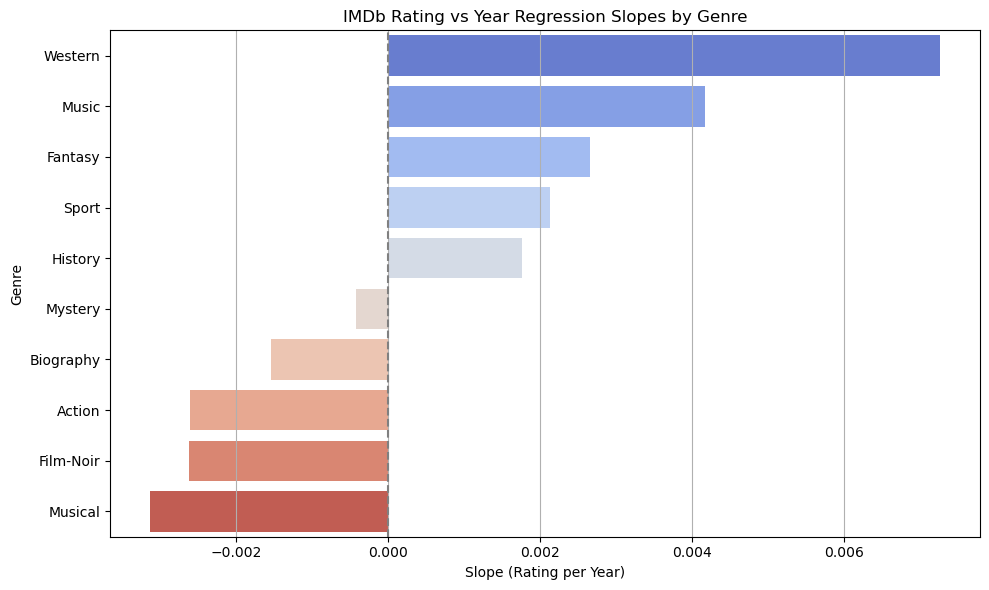

In [319]:
df_genre['Genre'] = df_genre['Genre'].str.split(', ')
df_genre = df_genre.explode('Genre') 

def compute_slope(group_df):
    if group_df['Year'].nunique() > 1:
        slope, _, _, _, _ = linregress(group_df['Year'], group_df['IMDb_Rating'])
        return slope
    return None

genre_slopes = df_genre.groupby('Genre').apply(compute_slope).dropna().reset_index()
genre_slopes.columns = ['Genre', 'Regression_Slope']
genre_slopes = genre_slopes.sort_values(by='Regression_Slope', ascending=False)

top_pos = genre_slopes.head(5)
top_neg = genre_slopes.tail(5)
genre_slopes_plot = pd.concat([top_pos, top_neg])

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_slopes_plot, x='Regression_Slope', y='Genre', palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title('IMDb Rating vs Year Regression Slopes by Genre')
plt.xlabel('Slope (Rating per Year)')
plt.ylabel('Genre')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


**Inference**

We analyzed how IMDb ratings have changed over time for each genre. Genres like Short, Western, and Sci-Fi show positive regression slopes, suggesting a rise in critical or audience appreciation in recent years. In contrast, Documentary, Musical, and Film-Noir exhibit negative slopes, indicating stronger historical performance and relatively lower modern reception. This analysis highlights how genre evolution and viewer expectations shape long-term critical trends.

## iii. Interactive Widgets:

In [320]:
fig = px.scatter(
    df_movies,
    x='IMDb_Rating',
    y='Gross',
    color='Rated',
    hover_data=['Movie Name', 'Director', 'Votes'],
    title='IMDb Rating vs Gross Revenue by Certificate',
    labels={
        'IMDb_Rating': 'IMDb Rating',
        'Gross': 'Gross Revenue (in Millions USD)',
        'Rated': 'Movie Certificate'
    }
)
fig.update_traces(
    hovertemplate=
        "<b>%{customdata[0]}</b><br>" +
        "Director: %{customdata[1]}<br>" +
        "Rating: %{x}<br>" +
        "Gross: $%{y:.2f}M<br>" +
        "Votes: %{customdata[2]:,}<extra></extra>",
    customdata=df_movies[['Movie Name', 'Director', 'Votes']]
)
fig.update_layout(
    height=600,
    width=900,
    legend_title_text='Rated'
)
fig.show()

**Inference**

This interactive scatter plot visualizes the relationship between IMDb rating and gross revenue of movies, categorized by their certificate (e.g., PG, R). Each point represents a movie, with hover tooltips revealing the movie name, director, rating, gross earnings, and vote count. The chart allows viewers to explore whether higher-rated films tend to earn more, how different ratings perform commercially, and identify standout titles or directors. By highlighting patterns and outliers, it offers quick insights into the connection between critical reception and box office success.